<h2><center>American Sign Language Detection</center></h2>

***I've added the final model as a dataset link. Since running this notebook requires GPU consumtion and it's quite time consuming, if you just want the model, you may get it from here https://www.kaggle.com/namanmanchanda/american-sign-language-model-99-accuracy.***

Table of contents <a id=19></a>
1. [Importing packages](#1)
2. [Importing the dataset from training directory](#2)
    - 2.1 [Checking the shape of data](#3)
    - 2.2 [Checking the shape of one image](#4)
    - 2.3 [Viewing the image](#5)
3. [Data processing](#6)
    - 3.1 [Train/test split](#7)
    - 3.2 [One-Hot-Encoding](#8)
    - 3.3 [Dimension Check of variables](#9)
4. [Garbage Collection](#10)
5. [Modeling](#11)
    - 5.1 [Importing packages](#12)
    - 5.2 [Building the model](#13)
    - 5.3 [Early Stopping & Compiling](#14)
    - 5.4 [Model fitting](#15)
    - 5.5 [Model metrics](#16)
    - 5.6 [Predictions](#17)
    - 5.7 [Saving the model](#18)

### 1. Importing packages <a id=1></a>

In [1]:
# import data processing and visualisation libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import image processing libraries
import cv2
import skimage
from skimage.transform import resize

# import tensorflow and keras
import tensorflow as tf
from tensorflow import keras
import os

print("Packages imported...")

Packages imported...


### 2. Importing the dataset from training directory <a id=2></a>

In [2]:
batch_size = 64
imageSize = 64
target_dims = (imageSize, imageSize, 3)
num_classes = 29

train_len = 87000
train_dir = '/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/'

def get_data(folder):
    X = np.empty((train_len, imageSize, imageSize, 3), dtype=np.float32)
    y = np.empty((train_len,), dtype=np.int)
    cnt = 0
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['A']:
                label = 0
            elif folderName in ['B']:
                label = 1
            elif folderName in ['C']:
                label = 2
            elif folderName in ['D']:
                label = 3
            elif folderName in ['E']:
                label = 4
            elif folderName in ['F']:
                label = 5
            elif folderName in ['G']:
                label = 6
            elif folderName in ['H']:
                label = 7
            elif folderName in ['I']:
                label = 8
            elif folderName in ['J']:
                label = 9
            elif folderName in ['K']:
                label = 10
            elif folderName in ['L']:
                label = 11
            elif folderName in ['M']:
                label = 12
            elif folderName in ['N']:
                label = 13
            elif folderName in ['O']:
                label = 14
            elif folderName in ['P']:
                label = 15
            elif folderName in ['Q']:
                label = 16
            elif folderName in ['R']:
                label = 17
            elif folderName in ['S']:
                label = 18
            elif folderName in ['T']:
                label = 19
            elif folderName in ['U']:
                label = 20
            elif folderName in ['V']:
                label = 21
            elif folderName in ['W']:
                label = 22
            elif folderName in ['X']:
                label = 23
            elif folderName in ['Y']:
                label = 24
            elif folderName in ['Z']:
                label = 25
            elif folderName in ['del']:
                label = 26
            elif folderName in ['nothing']:
                label = 27
            elif folderName in ['space']:
                label = 28           
            else:
                label = 29
            for image_filename in os.listdir(folder + folderName):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    img_arr = np.asarray(img_file).reshape((-1, imageSize, imageSize, 3))
                    
                    X[cnt] = img_arr
                    y[cnt] = label
                    cnt += 1
    return X,y
X_train, y_train = get_data(train_dir)
print("Images successfully imported...")

Images successfully imported...


#### 2.1 Checking the shape of data <a id=3></a>

In [3]:
print("The shape of X_train is : ", X_train.shape)
print("The shape of y_train is : ", y_train.shape)

The shape of X_train is :  (87000, 64, 64, 3)
The shape of y_train is :  (87000,)


#### 2.2 Checking the shape of one image <a id=4></a>

In [4]:
print("The shape of one image is : ", X_train[0].shape)

The shape of one image is :  (64, 64, 3)


#### 2.3 Viewing the image <a id=5></a>

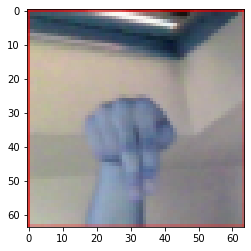

In [5]:
plt.imshow(X_train[0])
plt.show()

##### 2.3.1 Making copies of original data

In [6]:
X_data = X_train
y_data = y_train
print("Copies made...")

Copies made...


### 3. Data processing <a id=6></a>

#### 3.1 Train/test split <a id=7></a>

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3,random_state=42,stratify=y_data)

#### 3.2 One-Hot-Encoding <a id=8></a>

In [8]:
# One-Hot-Encoding the categorical data
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train,29)
y_cat_test = to_categorical(y_test,29)

#### 3.3 Dimension Check of variables <a id=9></a>

In [9]:
# Checking the dimensions of all the variables
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_cat_train.shape)
print(y_cat_test.shape)

(60900, 64, 64, 3)
(60900,)
(26100, 64, 64, 3)
(26100,)
(60900, 29)
(26100, 29)


### 4. Garbage Collection <a id=10></a>

In [10]:
# This is done to save CPU and RAM space while working on Kaggle Kernels. This will delete the specified data and save some space!
import gc
del X_data
del y_data
gc.collect()

2483

### 5. Modeling <a id=11></a>

#### 5.1 Importing packages <a id=12></a>

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
print("Packages imported...")

Packages imported...


#### 5.2 Building model <a id=13></a>

In [12]:
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(64, 64, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(29, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 32)        2432      
_________________________________________________________________
activation (Activation)      (None, 60, 60, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        3

#### 5.3 Early Stopping and Compiling <a id=14></a>

##### 5.3.1 Early Stopping

Early Stopping is done to make sure the model fitting stops at the most optimized accuracy point. After the early stopping point, the model might start overfitting. For testing purposes, this step can be skipped and complete training can be done.

In [13]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

##### 5.3.2 Compiling

In [14]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### 5.4 Model fitting <a id=15></a>

In [15]:
model.fit(X_train, y_cat_train,
          epochs=50,
          batch_size=64,
          verbose=2,
          validation_data=(X_test, y_cat_test),
         callbacks=[early_stop])

Epoch 1/50
952/952 - 8s - loss: 1.0265 - accuracy: 0.6920 - val_loss: 0.2371 - val_accuracy: 0.9224
Epoch 2/50
952/952 - 7s - loss: 0.1369 - accuracy: 0.9565 - val_loss: 0.0739 - val_accuracy: 0.9772
Epoch 3/50
952/952 - 7s - loss: 0.0726 - accuracy: 0.9778 - val_loss: 0.0732 - val_accuracy: 0.9769
Epoch 4/50
952/952 - 7s - loss: 0.0521 - accuracy: 0.9844 - val_loss: 0.0334 - val_accuracy: 0.9905
Epoch 5/50
952/952 - 7s - loss: 0.0424 - accuracy: 0.9878 - val_loss: 0.0464 - val_accuracy: 0.9855
Epoch 6/50
952/952 - 7s - loss: 0.0323 - accuracy: 0.9903 - val_loss: 0.0271 - val_accuracy: 0.9918
Epoch 7/50
952/952 - 7s - loss: 0.0287 - accuracy: 0.9914 - val_loss: 0.0229 - val_accuracy: 0.9936
Epoch 8/50
952/952 - 7s - loss: 0.0277 - accuracy: 0.9917 - val_loss: 0.0252 - val_accuracy: 0.9933
Epoch 9/50
952/952 - 7s - loss: 0.0271 - accuracy: 0.9925 - val_loss: 0.0251 - val_accuracy: 0.9927


#### 5.5 Model metrics <a id=16></a>

##### 5.5.1 Metrics from model history

In [16]:
metrics = pd.DataFrame(model.history.history)
print("The model metrics are")
metrics

The model metrics are


,loss,accuracy,val_loss,val_accuracy
0,1.026477,0.692003,0.237056,0.922414
1,0.136943,0.956502,0.073942,0.977203
2,0.072560,0.977800,0.073244,0.976935
3,0.052082,0.984401,0.033399,0.990460
4,0.042415,0.987816,0.046446,0.985479
5,0.032327,0.990345,0.027106,0.991839
6,0.028742,0.991363,0.022894,0.993640
7,0.027655,0.991691,0.025223,0.993333
8,0.027121,0.992529,0.025146,0.992720


##### 5.5.2 Plotting the training loss

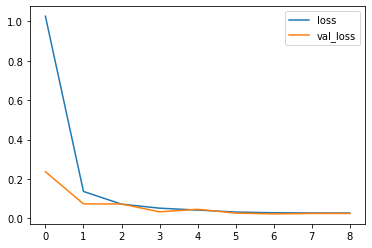

In [17]:
metrics[['loss','val_loss']].plot()
plt.show()

##### 5.5.3 Plotting the testing loss

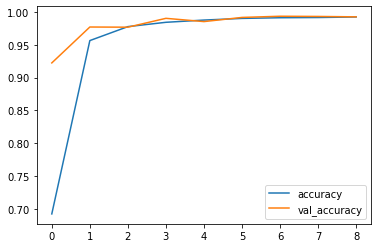

In [18]:
metrics[['accuracy','val_accuracy']].plot()
plt.show()

##### 5.5.4 Model evaluation

In [19]:
model.evaluate(X_test,y_cat_test,verbose=0)

[0.02514614351093769, 0.9927203059196472]

#### 5.6 Predictions <a id=17></a>

In [20]:
predictions = model.predict_classes(X_test)
print("Predictions done...")

Predictions done...


##### 5.6.1 Classification report

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       900
           1       1.00      0.97      0.98       900
           2       1.00      1.00      1.00       900
           3       1.00      1.00      1.00       900
           4       0.99      0.99      0.99       900
           5       1.00      1.00      1.00       900
           6       1.00      0.97      0.99       900
           7       1.00      0.99      0.99       900
           8       0.99      1.00      0.99       900
           9       0.99      1.00      1.00       900
          10       0.99      0.96      0.98       900
          11       0.99      1.00      1.00       900
          12       1.00      0.99      0.99       900
          13       0.99      1.00      0.99       900
          14       1.00      0.99      1.00       900
          15       0.98      1.00      0.99       900
          16       1.00      1.00      1.00       900
          17       0.97    

##### 5.6.2 Confusion matrix heatmap

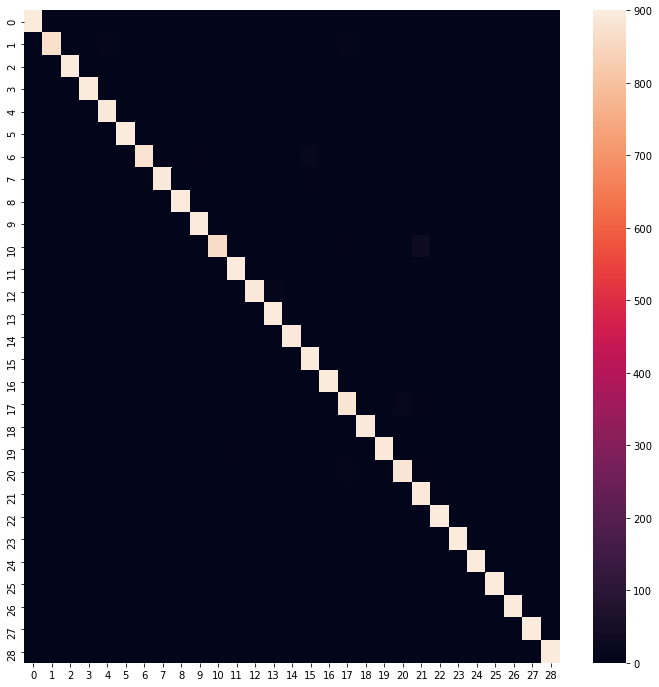

In [22]:
plt.figure(figsize=(12,12))
sns.heatmap(confusion_matrix(y_test,predictions))
plt.show()

#### 5.7 Saving the model <a id=18></a>

In [23]:
# from keras.models import load_model
# model.save('ASL.h5')
print("Model saved successfully...")

Model saved successfully...


[back to top](#19)

### If you liked the notebook, consider giving an upvote.

Check my other notebooks
1. https://www.kaggle.com/namanmanchanda/rnn-in-pytorch
2. https://www.kaggle.com/namanmanchanda/pytorch-101
3. https://www.kaggle.com/namanmanchanda/red-wine-eda-and-classification
4. https://www.kaggle.com/namanmanchanda/heart-attack-eda-prediction-90-accuracy